In [96]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import matplotlib as plt

### 1. The Atoms of Computation

This is the start of the notebook and has all the examples that will be there used in the prepration phase.

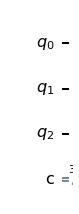

In [2]:
#The first quantum algorithm
#Drawing the first Quantum Circuit
n = 3
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)
qc_output.draw('mpl')

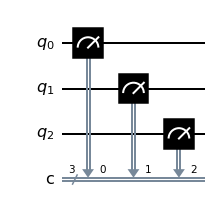

In [3]:
#Measuring the result
for i in range(n):
    qc_output.measure(i,i)

#qc_output.measure_all()
qc_output.draw('mpl')

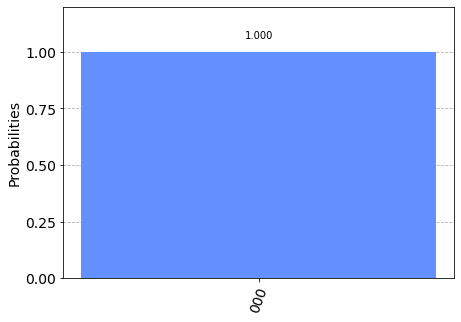

In [6]:
#Simulating and plotting the results
sim = Aer.get_backend('qasm_simulator') #The simulator used 
qobj = assemble(qc_output) #This command turns the circuit into an object which the simulator can run
result = sim.run(qobj).result() #After execution of the experiment we get the result of the experiment
#in the form of a dict which is the number of counts that we have
counts = result.get_counts()
#Displaying the result that we get
plot_histogram(counts)

In [50]:
for backends in Aer.backends():
    print(backends.name())

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


### Simple Adder

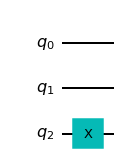

In [51]:
qc_encode = QuantumCircuit(n)
qc_encode.x(n-1)
qc_encode.draw('mpl')

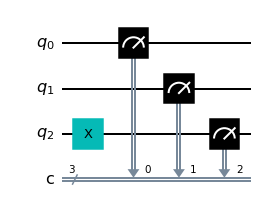

In [52]:
qc = qc_encode + qc_output
qc.draw('mpl')

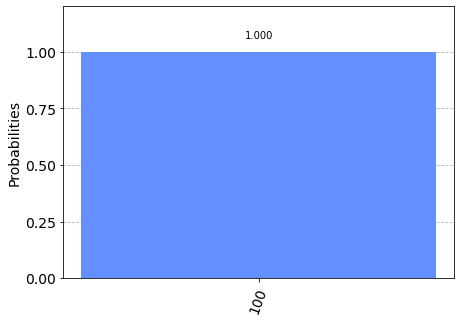

In [53]:
qobj = assemble(qc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

#### CNOT & Taffoli Gate Implementation

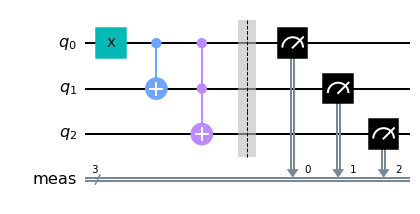

In [65]:
#CNOT
qc = QuantumCircuit(n)

qc.x(0)
qc.cx(0,1)
qc.ccx(0,1,2)

qc.measure_all()
qc.draw('mpl')

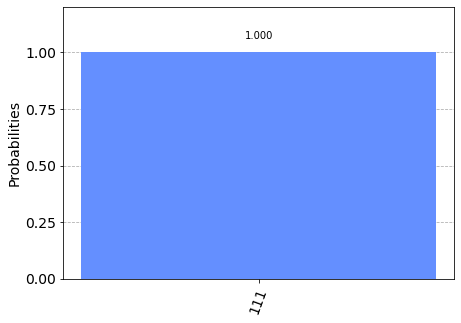

In [66]:
backend = Aer.get_backend('qasm_simulator')
qobj = assemble(qc)
counts = backend.run(qobj).result().get_counts()
plot_histogram(counts)

### 2. Representing Qubit States

In [7]:
from math import sqrt, pi

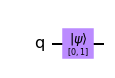

In [18]:
qc = QuantumCircuit(1)
initial_state = [0,1]
qc.initialize(initial_state,0)
qc.draw('mpl')

In [19]:
sim = Aer.get_backend('statevector_simulator')
#qc.save_statevector()
qobj = assemble(qc)
result = sim.run(qobj).result()

In [20]:
out_state = result.get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


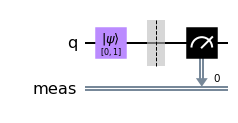

In [21]:
qc.measure_all()
qc.draw('mpl')

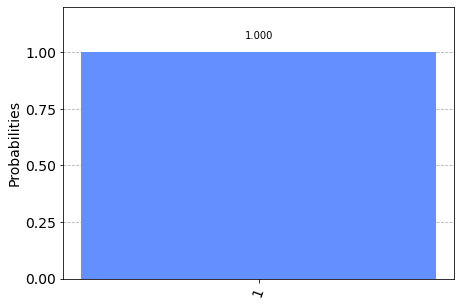

In [22]:
counts = result.get_counts()
plot_histogram(counts)

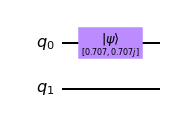

In [108]:
#Superposition
qc = QuantumCircuit(2)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state,0)
qc.draw('mpl')

In [109]:
backend = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = backend.run(qobj).result()
state = result.get_statevector()

print(state)

[0.70710678+0.j         0.        +0.70710678j 0.        +0.j
 0.        +0.j        ]


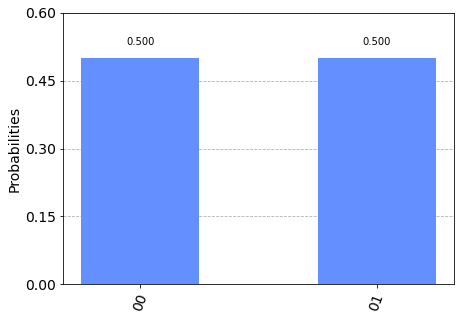

In [110]:
counts = result.get_counts()
plot_histogram(counts)

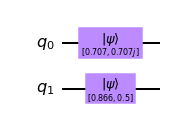

In [111]:
initial_vector = [sqrt(3/4),1/sqrt(4)]
qc.initialize(initial_vector,1)
qc.draw('mpl')

In [112]:
qc.measure_all()

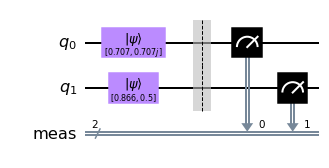

In [113]:
qc.draw('mpl')

In [114]:
qobj = assemble(qc)
result = backend.run(qobj).result()
counts = result.get_counts()

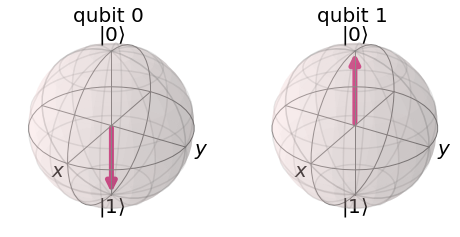

In [115]:
state = result.get_statevector()
plot_bloch_multivector(state)

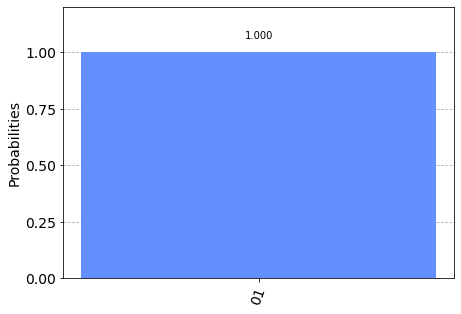

In [116]:
plot_histogram(counts)

### 3. Single Qubit Gates

Pauli X Gate

In [142]:
qc = QuantumCircuit(1)

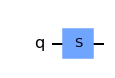

In [143]:
qc.s(0)
qc.draw('mpl')

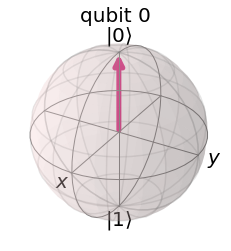

In [144]:
backend = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(result)